Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Presentation: Game of Thrones

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy as scp

from pandas import DataFrame

# Data - cleaning and first overview

First, we simply plot the data to get a feeling for it's content:

In [6]:
dataFrameBattels = pd.read_csv("gameofthrones/battles.csv")

#Battels DataFrame
print('Battels categories: ')
for i in dataFrameBattels.columns: print(i)

print('Battels Shape:' + str(dataFrameBattels.shape))

print("Number of battels: " + str(dataFrameBattels.battle_number.nunique()))

Battels categories: 
name
year
battle_number
attacker_king
defender_king
attacker_1
attacker_2
attacker_3
attacker_4
defender_1
defender_2
defender_3
defender_4
attacker_outcome
battle_type
major_death
major_capture
attacker_size
defender_size
attacker_commander
defender_commander
summer
location
region
note
Battels Shape:(38, 25)
Number of battels: 38


In [10]:
#Character death DataFrame
dataFrameChar = pd.read_csv("gameofthrones/character_deaths.csv")


dataFrameChar.drop(dataFrameChar.columns[[8,9,10,11,12]], axis=1, inplace=True)

print('\n'+'Character deaths categories: ')
for i in dataFrameChar.columns: print(i)    

print("Characters death shape: " + str(dataFrameChar.shape))

print("Number of Characters: " + str(dataFrameChar.Name.nunique()))


Character deaths categories: 
Name
Allegiances
Death Year
Book of Death
Death Chapter
Book Intro Chapter
Gender
Nobility
Characters death shape: (917, 8)
Number of Characters: 916


In [12]:
#Character prediction DataFrame
dataFrameCharPre = pd.read_csv("gameofthrones/character_predictions.csv")

print('\n'+'Character predictions categories: ')
for i in dataFrameCharPre.columns: print(i)

print("Characters presiction shape: " + str(dataFrameCharPre.shape))

print("Number of Characters: " + str(dataFrameCharPre.name.nunique()))


Character predictions categories: 
S.No
actual
pred
alive
plod
name
title
male
culture
dateOfBirth
DateoFdeath
mother
father
heir
house
spouse
book1
book2
book3
book4
book5
isAliveMother
isAliveFather
isAliveHeir
isAliveSpouse
isMarried
isNoble
age
numDeadRelations
boolDeadRelations
isPopular
popularity
isAlive
Characters presiction shape: (1946, 33)
Number of Characters: 1946


# Plots and analysis

# Battels

Pitched Battle: An intense battle fought in close contact by troops arranged in a predetermined formation.
An ambush: is a long-established military tactic in which combatants take advantage of concealment and the element of surprise to attack unsuspecting enemy
A siege is a military blockade of a city, or fortress, with the intent of conquering by attrition, or a well-prepared assault.
Razing: complete destruction


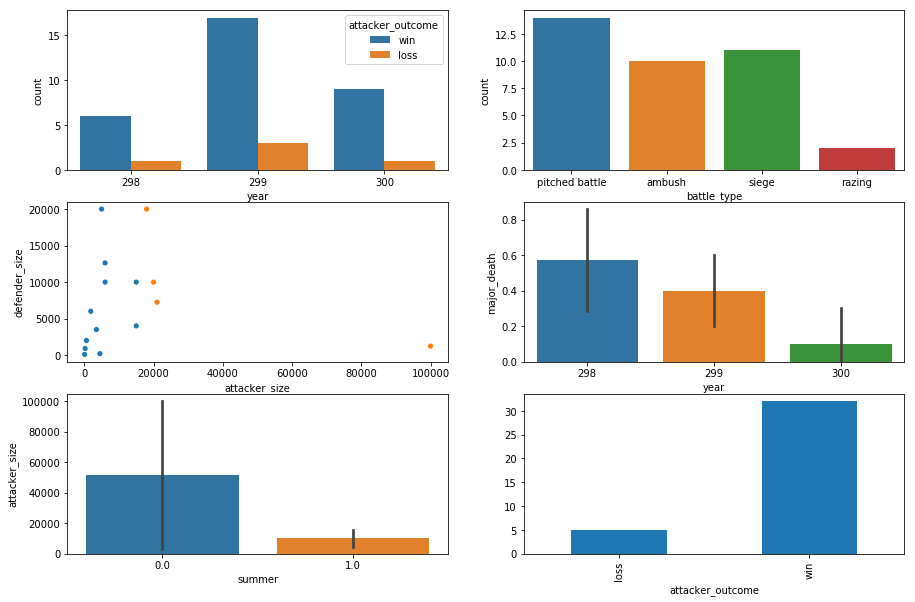

In [47]:
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(15,10))

print('Pitched Battle: An intense battle fought in close contact by troops arranged in a predetermined formation.')
print('An ambush: is a long-established military tactic in which combatants take advantage of concealment and the element of surprise to attack unsuspecting enemy')
print('A siege is a military blockade of a city, or fortress, with the intent of conquering by attrition, or a well-prepared assault.')
print('Razing: complete destruction')

sns.countplot(x = "year", hue = "attacker_outcome",data= dataFrameBattels, ax=axes[0][0])

sns.countplot(x="battle_type",data= dataFrameBattels, ax=axes[0][1])

df_no_nan = dataFrameBattels.dropna(subset=['attacker_size', 'defender_size', 'attacker_outcome'])

sns.relplot(data = df_no_nan, x='attacker_size', y='defender_size',hue = "attacker_outcome", ax=axes[1][0])

df_no_nan_2 = dataFrameBattels.dropna(subset=['year', 'major_death'])

sns.barplot(x="year",y="major_death",data= df_no_nan_2, ax=axes[1][1])

out=dataFrameBattels.groupby(["summer", 'attacker_outcome'])['attacker_size', 'defender_size'].mean().reset_index()
sns.barplot(x = "summer", y= 'attacker_size', data=out,ax=axes[2][0])

dataFrameBattels.groupby('attacker_outcome').size().plot(kind="bar",ax=axes[2][1])
plt.close()


# Character Deaths

How many (main) Characters died per year?: 
Death Year
297.0      3
298.0     46
299.0    156
300.0    100


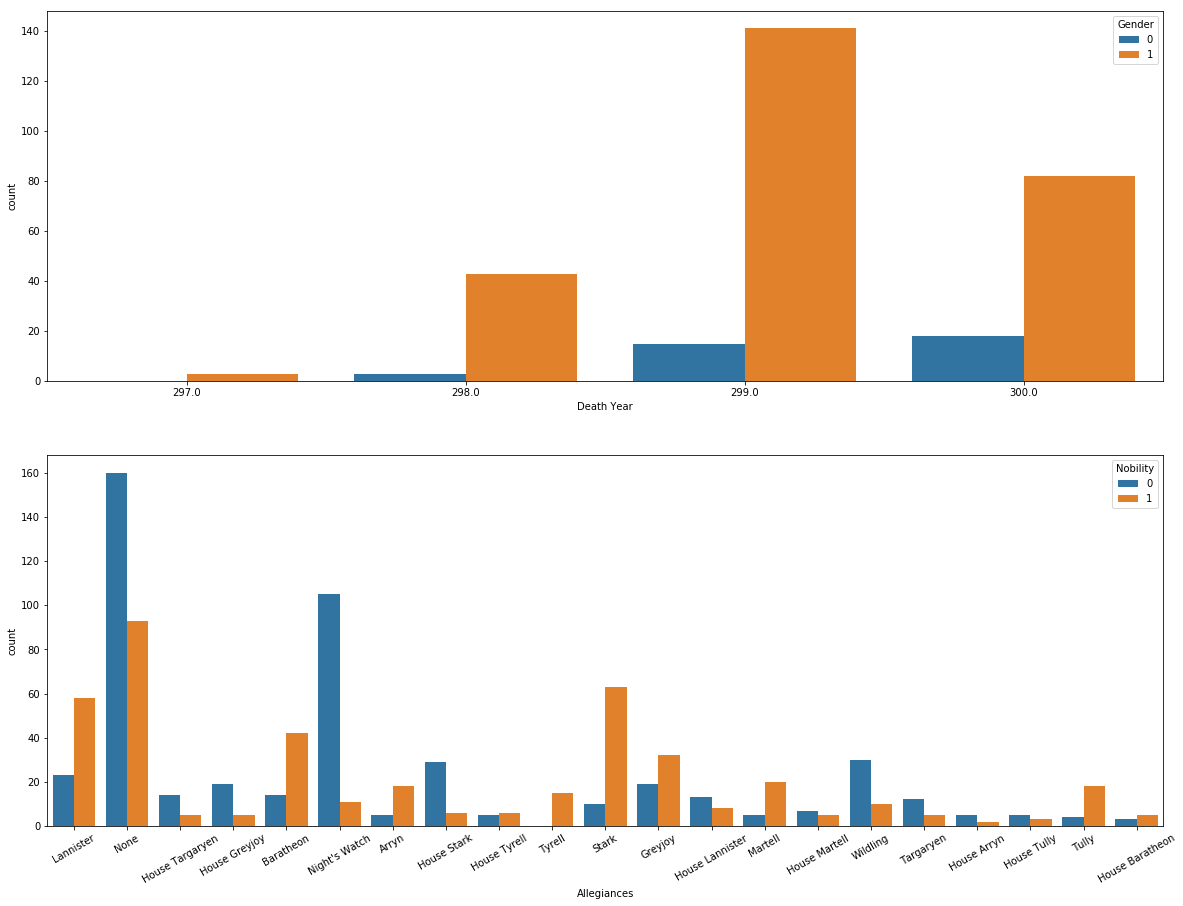

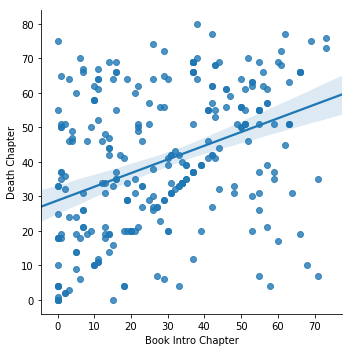

In [31]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(20,15))

death_per_year = dataFrameChar.groupby(["Death Year"])["Allegiances"].count()
print("How many (main) Characters died per year?: " +'\n'+ death_per_year.to_string())

sns.countplot(x = "Death Year", hue = "Gender",data= dataFrameChar, ax=axes[0])

b =sns.countplot(x = "Allegiances", hue = "Nobility",data= dataFrameChar, ax=axes[1])
b.set_xticklabels(b.get_xticklabels(), rotation=30)

duration_frame = dataFrameChar.dropna(subset=['Death Chapter', 'Book Intro Chapter'])

sns.lmplot(data = duration_frame, x ='Book Intro Chapter', y='Death Chapter')

plt.tight_layout()
plt.show()
plt.close()


# Character Predictions

[Text(0, 0, '0.0'),
 Text(0, 0, '0.1'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.3'),
 Text(0, 0, '0.4'),
 Text(0, 0, '0.5'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.7'),
 Text(0, 0, '0.8'),
 Text(0, 0, '0.9'),
 Text(0, 0, '1.0')]

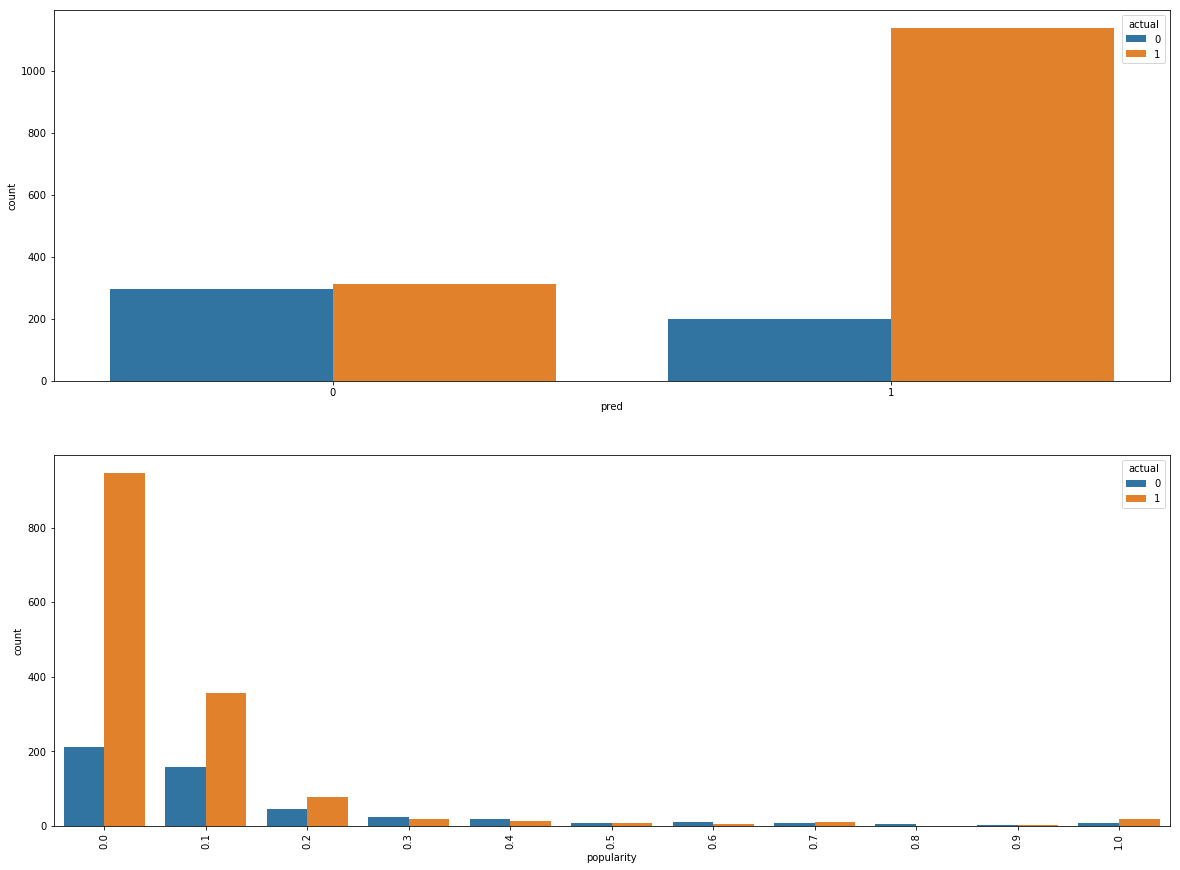

In [68]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(20,15))

clean_df = dataFrameCharPre.dropna(subset=['actual', 'popularity'])
clean_df = clean_df.round({'popularity': 1})
b = sns.countplot(data = clean_df, x='pred', hue='actual',ax=axes[0])

a = sns.countplot(data = clean_df, x='popularity', hue='actual',ax=axes[1])
a.set_xticklabels(a.get_xticklabels(), rotation=90)
